In [1]:
import gtfs_kit as gk
from pathlib import Path
from hmr_utils import *
import pandas as pd
import os
%matplotlib inline

In [2]:
retrain = False # Set to true to retrain the random forest model
data_folder = '/Users/alfredo.leon/Desktop/DataMiningProject/tagged_correct/'
routes = []
for _file in os.listdir(data_folder):
    print(_file)
    route = pd.read_parquet(f"{data_folder}{_file}", engine='fastparquet')
    #route.dropna(subset=['qas_indi_real', 'qas_indi_pred'])
    routes.append(route)
routes = pd.concat(routes)
routes['period'] = routes['period'].astype(str)
routes


tagged_20210911_77_0
tagged_20210918_65_0
tagged_20210911_77_1
tagged_20210918_65_1
tagged_20210915_65_0
tagged_20210915_65_1
tagged_20210911_34_1
tagged_20210908_65_1
tagged_20210908_65_0
tagged_20210911_34_0
tagged_20210915_77_1
tagged_20210915_77_0
tagged_20210918_77_1
tagged_20210908_55_1
tagged_20210911_65_1
tagged_20210908_34_1
tagged_20210918_77_0
tagged_20210908_34_0
tagged_20210911_65_0
tagged_20210908_55_0
tagged_20210915_34_0
tagged_20210915_55_0
tagged_20210915_55_1
tagged_20210915_34_1
tagged_20210908_77_0
tagged_20210918_34_0
tagged_20210908_77_1
tagged_20210918_34_1


,route_id,service_id,trip_id,trip_headsign,block_id,shape_id,arrival_time,departure_time_col,stop_sequence,pickup_type,...,start_date,end_date,headway,mvavg,qas_indi_pred,qas_indi_real,period,date,direction_id,stop_id
departure_time,,,,,,,,,,,,,,,,,,,,,
2022-12-13 06:11:57,77,237282501,113280116237282501,WIENER,8934983,095b0096,06:11:57,06:11:57,4,0,...,20210904,20210918,NaN,NaN,None,None,2022-12-13 06:00:00,20210911,0,1128
2022-12-13 06:41:57,77,237282501,113280366237282501,WIENER,8936041,095b0096,06:41:57,06:41:57,4,0,...,20210904,20210918,1800.0,NaN,None,PUNCTUALITY,2022-12-13 06:30:00,20210911,0,1128
2022-12-13 07:05:08,77,237282501,113280367237282501,WIENER,8934985,095b0096,07:05:08,07:05:08,4,0,...,20210904,20210918,1391.0,NaN,None,PUNCTUALITY,2022-12-13 07:00:00,20210911,0,1128
2022-12-13 07:20:08,77,237282501,113280368237282501,WIENER,8934988,095b0096,07:20:08,07:20:08,4,0,...,20210904,20210918,900.0,NaN,None,PUNCTUALITY,2022-12-13 07:00:00,20210911,0,1128
2022-12-13 07:35:08,77,237282501,113280369237282501,WIENER,8934986,095b0096,07:35:08,07:35:08,4,0,...,20210904,20210918,900.0,NaN,None,PUNCTUALITY,2022-12-13 07:30:00,20210911,0,1128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-13 22:25:00,34,237074500,113214869237074500,PORTE DE NAMUR,8929544,034b0011,22:25:00,22:25:00,17,0,...,20210904,20210918,900.0,900.0,PUNCTUALITY,PUNCTUALITY,2022-12-13 22:00:00,20210918,1,6432
2022-12-13 22:45:00,34,237074500,113214870237074500,PORTE DE NAMUR,8929547,034b0011,22:45:00,22:45:00,17,0,...,20210904,20210918,1200.0,960.0,PUNCTUALITY,PUNCTUALITY,2022-12-13 22:30:00,20210918,1,6432
2022-12-13 23:05:00,34,237074500,113214871237074500,PORTE DE NAMUR,8929545,034b0011,23:05:00,23:05:00,17,0,...,20210904,20210918,1200.0,1020.0,PUNCTUALITY,PUNCTUALITY,2022-12-13 23:00:00,20210918,1,6432


In [3]:
routes['qas_indi_real'].value_counts()
routes.head().T

departure_time,2022-12-13 06:11:57,2022-12-13 06:41:57,2022-12-13 07:05:08,2022-12-13 07:20:08,2022-12-13 07:35:08
route_id,77,77,77,77,77
service_id,237282501,237282501,237282501,237282501,237282501
trip_id,113280116237282501,113280366237282501,113280367237282501,113280368237282501,113280369237282501
trip_headsign,WIENER,WIENER,WIENER,WIENER,WIENER
block_id,8934983,8936041,8934985,8934988,8934986
shape_id,095b0096,095b0096,095b0096,095b0096,095b0096
arrival_time,06:11:57,06:41:57,07:05:08,07:20:08,07:35:08
departure_time_col,06:11:57,06:41:57,07:05:08,07:20:08,07:35:08
stop_sequence,4,4,4,4,4
pickup_type,0,0,0,0,0


In [4]:
# Split into train and test sets.
from sklearn.model_selection import train_test_split
features_to_train = ['route_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 
                     'headway', 'mvavg', 'period', 'date', 'direction_id', 'stop_id']
routes.dropna(inplace=True)
X = routes[features_to_train]
X = pd.get_dummies(X)
y = routes['qas_indi_real']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle
filename = 'rm_forest.sav'
if retrain:
    classifier = GridSearchCV(
        estimator=RandomForestClassifier(), 
        param_grid={
            'n_estimators': [10, 20, 30, 40, 50], 
            'max_depth': [2, 3, 4, 5], 
            'criterion': ['gini', 'entropy', 'log_loss']}
    )
    classifier = classifier.fit(X_train, y_train)
    pickle.dump(classifier, open(filename, 'wb'))
else:
    print(f"Loading saved model at {filename}")
    classifier = pickle.load(open(filename, 'rb'))
    result = classifier.score(X_test, y_test)
    print(result)

Loading saved model at rm_forest.sav
0.9760582010582011


In [6]:
classifier.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}

Accuracy: 0.9760582010582011, Precision: 0.9766332964711306, Recall: 0.9760582010582011


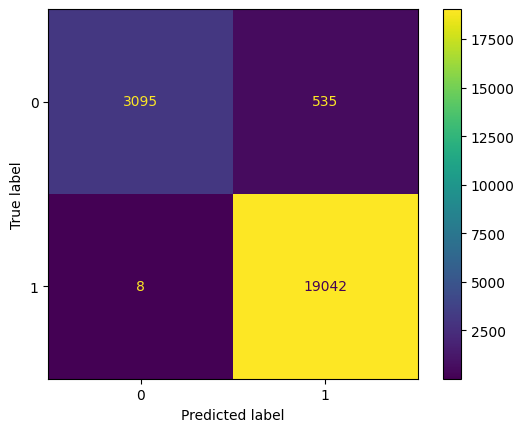

In [7]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred, average='weighted')}, Recall: {recall_score(y_test, y_pred, average='weighted')}")
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [8]:
# Now let's compare the initial approach with moving averages vs the trained_classifier
routes['qas_rm_forest'] = classifier.predict(pd.get_dummies(routes[features_to_train]))
print(f"Metrics from Random Forest Class: Accuracy: {accuracy_score(routes['qas_indi_real'], routes['qas_rm_forest'])}, Precision: {precision_score(routes['qas_indi_real'], routes['qas_rm_forest'], average='weighted')}, Recall: {recall_score(routes['qas_indi_real'], routes['qas_rm_forest'], average='weighted')}")
print(f"Metrics from MVA Class: Accuracy: {accuracy_score(routes['qas_indi_real'], routes['qas_indi_pred'])}, Precision: {precision_score(routes['qas_indi_real'], routes['qas_indi_pred'], average='weighted')}, Recall: {recall_score(routes['qas_indi_real'], routes['qas_indi_pred'], average='weighted')}")
routes['qas_rm_forest']

Metrics from Random Forest Class: Accuracy: 0.9761772486772486, Precision: 0.9767492499726024, Recall: 0.9761772486772486
Metrics from MVA Class: Accuracy: 0.9622486772486772, Precision: 0.9616133479194736, Recall: 0.9622486772486772


departure_time
2022-12-13 07:50:08    PUNCTUALITY
2022-12-13 08:04:08    PUNCTUALITY
2022-12-13 08:17:08    PUNCTUALITY
2022-12-13 08:27:08     REGULARITY
2022-12-13 08:37:08     REGULARITY
                          ...     
2022-12-13 22:25:00    PUNCTUALITY
2022-12-13 22:45:00    PUNCTUALITY
2022-12-13 23:05:00    PUNCTUALITY
2022-12-13 23:23:00    PUNCTUALITY
2022-12-13 23:43:00    PUNCTUALITY
Name: qas_rm_forest, Length: 75600, dtype: object

## Analysis for Days

In [9]:
from hmr_utils import *
import gtfs_kit as gk
from pathlib import Path
data_folder = '/Users/alfredo.leon/Desktop/DataMiningProject/Project Data-20221021/'
path = Path(data_folder+"gtfs3Sept.zip")
feed = (gk.read_feed(path, dist_units='km'))

In [10]:
routes.loc[routes.route_id == '65', 'date'].unique()

array(['20210918', '20210915', '20210908', '20210911'], dtype=object)

In [11]:
# Now let's compare the initial approach with moving averages vs the trained_classifier
routes['qas_rm_forest'] = None
routes['qas_rm_forest'] = classifier.predict(pd.get_dummies(routes[features_to_train]))
print(f"Metrics from Random Forest Class: Accuracy: {accuracy_score(routes['qas_indi_real'], routes['qas_rm_forest'])}, Precision: {precision_score(routes['qas_indi_real'], routes['qas_rm_forest'], average='weighted')}, Recall: {recall_score(routes['qas_indi_real'], routes['qas_rm_forest'], average='weighted')}")
print(f"Metrics from MVA Class: Accuracy: {accuracy_score(routes['qas_indi_real'], routes['qas_indi_pred'])}, Precision: {precision_score(routes['qas_indi_real'], routes['qas_indi_pred'], average='weighted')}, Recall: {recall_score(routes['qas_indi_real'], routes['qas_indi_pred'], average='weighted')}")
#routes['qas_rm_forest']

Metrics from Random Forest Class: Accuracy: 0.9761772486772486, Precision: 0.9767492499726024, Recall: 0.9761772486772486
Metrics from MVA Class: Accuracy: 0.9622486772486772, Precision: 0.9616133479194736, Recall: 0.9622486772486772


Text(0.5, 1.0, 'Monday 08 September 2021 Predicted Timegroups for Route 71, direction DELTA.')

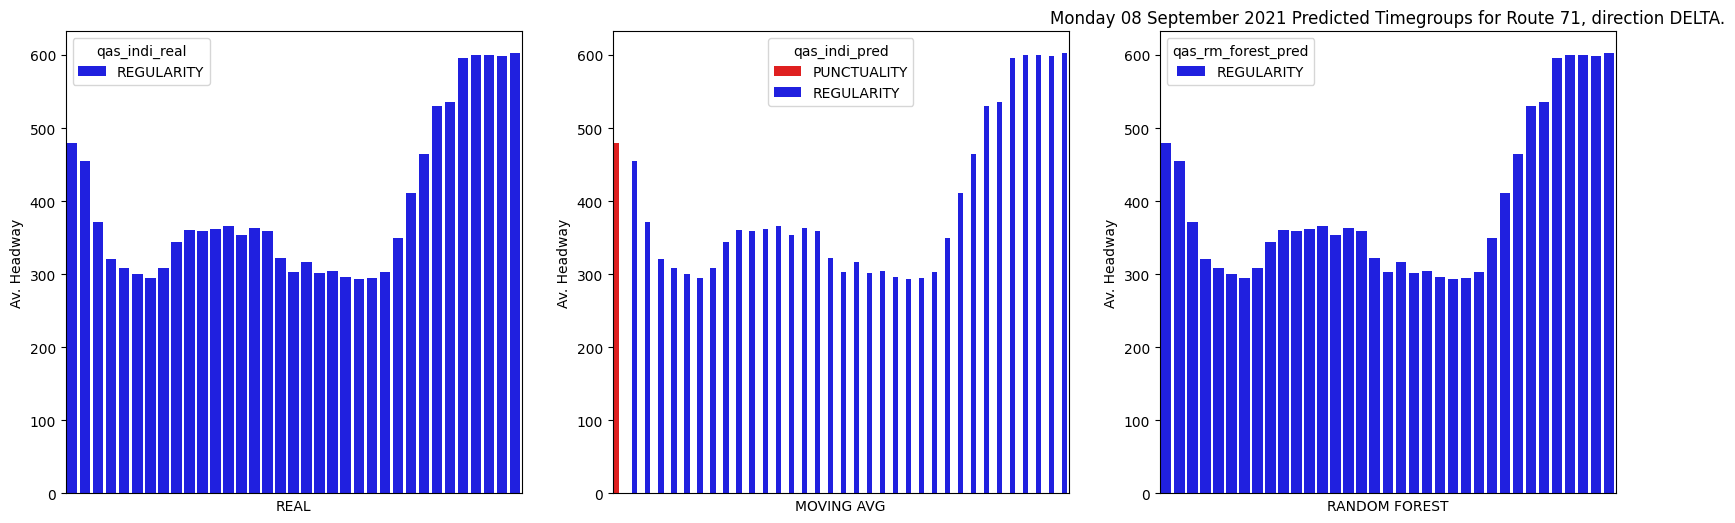

In [16]:
mondays = routes.loc[routes.date.isin(['20210908', '20210915'])]
mondays_routes = retrieve_average_time_periods_from_route(
    mondays.loc[(mondays.route_id == '65') & (mondays.date == '20210908') & (mondays.direction_id == 0)]
)
#plt.subplots(figsize = (20, 6))
fig, axs = plt.subplots(1,3, figsize=(20,6))
for ax, col, tit in zip(axs,["qas_indi_real", "qas_indi_pred", "qas_rm_forest_pred"], ["REAL", "MOVING AVG", "RANDOM FOREST"]):
    sns.barplot(x=mondays_routes.index, y="headway", hue=col, data=mondays_routes, 
                palette={"PUNCTUALITY": "r", "REGULARITY": "b"},ax = ax)
    ax.tick_params(
        axis='x',      
        which='both',      
        bottom=False,      
        top=False,        
        labelbottom=False
    )
    ax.set(xlabel=tit, ylabel="Av. Headway")

plt.title("Monday 08 September 2021 Predicted Timegroups for Route 71, direction DELTA.")

In [19]:
def plot_compare_classifiers(routes, route_id, day, direction_id, feed):
    day_routes = retrieve_average_time_periods_from_route(
        routes.loc[(routes.route_id == route_id) & (routes.date == day) & (routes.direction_id == direction_id)]
    )
    if day_routes.shape[0]!=0:
        #plt.subplots(figsize = (20, 6))
        fig, axs = plt.subplots(1,3, figsize=(20,6))
        for ax, col, tit in zip(axs,["qas_indi_real", "qas_indi_pred", "qas_rm_forest_pred"], ["REAL", "MOVING AVG", "RANDOM FOREST"]):
            sns.barplot(x=day_routes.index, y="headway", hue=col, data=day_routes,
                        palette={"PUNCTUALITY": "r", "REGULARITY": "b"}, ax = ax)
            ax.tick_params(
                axis='x',      
                which='both',      
                bottom=False,      
                top=False,        
                labelbottom=False
            )
            ax.set(xlabel=tit, ylabel="Av. Headway")
        route_name = get_route_name_from_route_id(route_id, feed.routes)
        direction = routes.loc[(routes.route_id == route_id) & (routes.date == day) & (routes.direction_id == direction_id)].iloc[0]['trip_headsign']
        plt.title(f"{day} Predicted Timegroups for Route {route_name}, direction {direction}.")

def plot_compare_classifiers_metrics(routes, route_id, day, direction_id, feed):
    day_routes = retrieve_average_time_periods_from_route(
        routes.loc[(routes.route_id == route_id) & (routes.date == day) & (routes.direction_id == direction_id)]
    )
    
    accuracy = accuracy_score(day_routes['qas_indi_real'], day_routes['qas_rm_forest_pred'])
    if day_routes.shape[0]!=0:
        #plt.subplots(figsize = (20, 6))
        fig, axs = plt.subplots(1,3, figsize=(20,6))
        for ax, col, tit in zip(axs,["qas_indi_real", "qas_indi_pred", "qas_rm_forest_pred"], ["REAL", "MOVING AVG", "RANDOM FOREST"]):
            sns.barplot(x=day_routes.index, y="headway", hue=col, data=day_routes,
                        palette={"PUNCTUALITY": "r", "REGULARITY": "b"}, ax = ax)
            ax.tick_params(
                axis='x',      
                which='both',      
                bottom=False,      
                top=False,        
                labelbottom=False
            )
            ax.set(xlabel=tit, ylabel="Av. Headway")
        route_name = get_route_name_from_route_id(route_id, feed.routes)
        direction = routes.loc[(routes.route_id == route_id) & (routes.date == day) & (routes.direction_id == direction_id)].iloc[0]['trip_headsign']
        plt.title(f"{day} Predicted Timegroups for Route {route_name}, direction {direction}.")
    

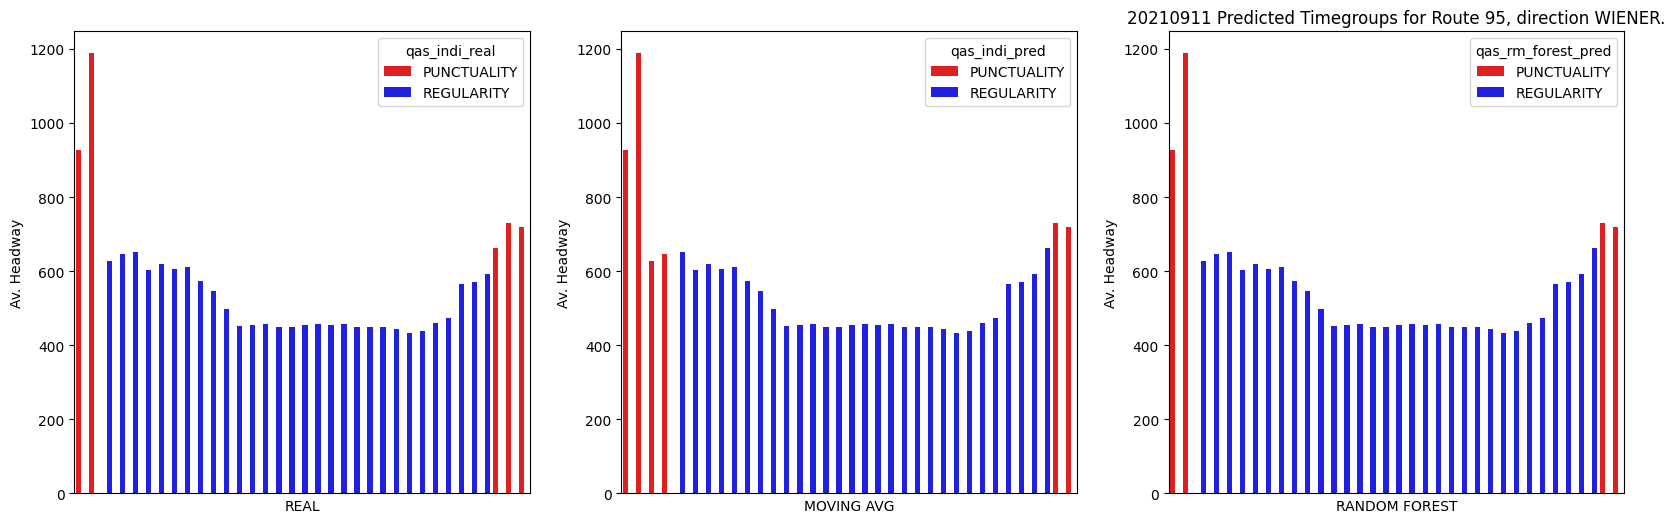

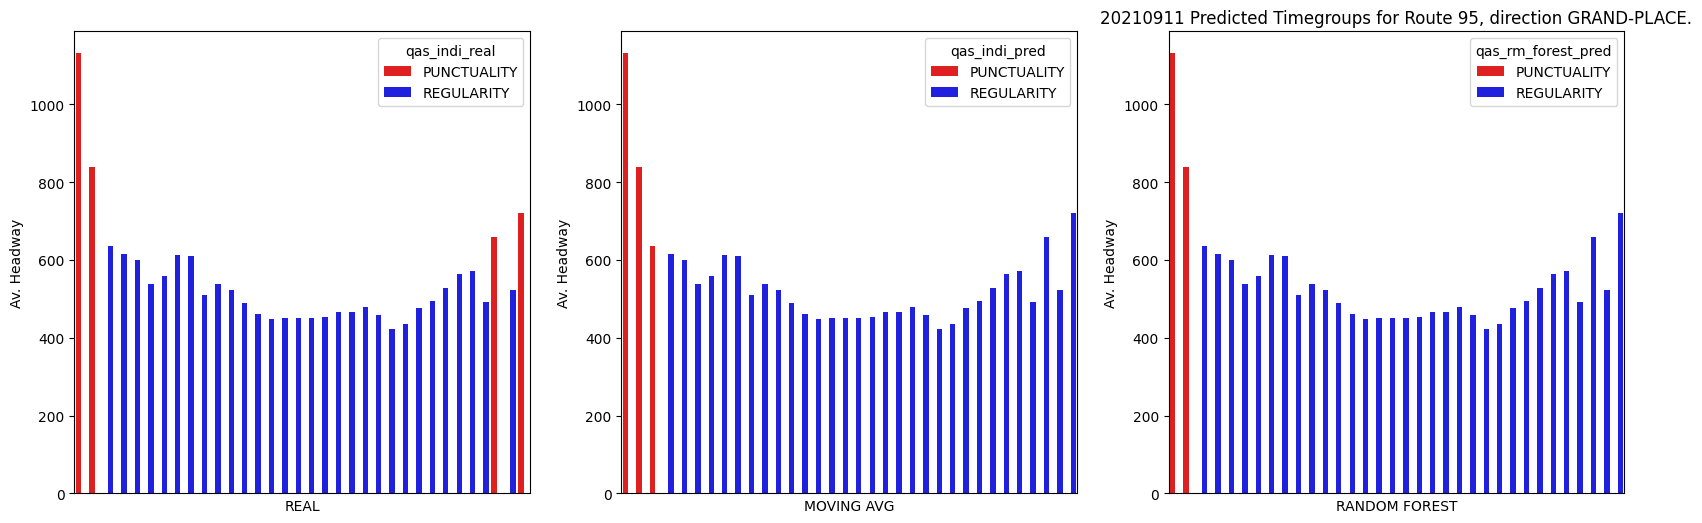

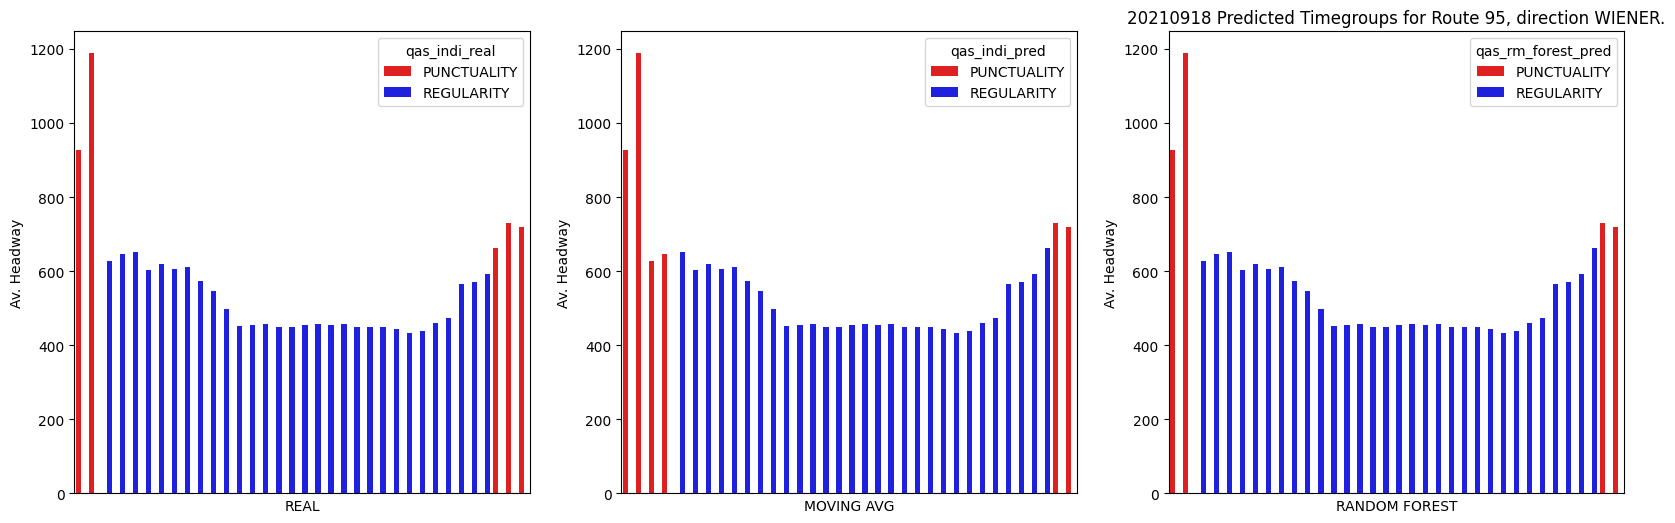

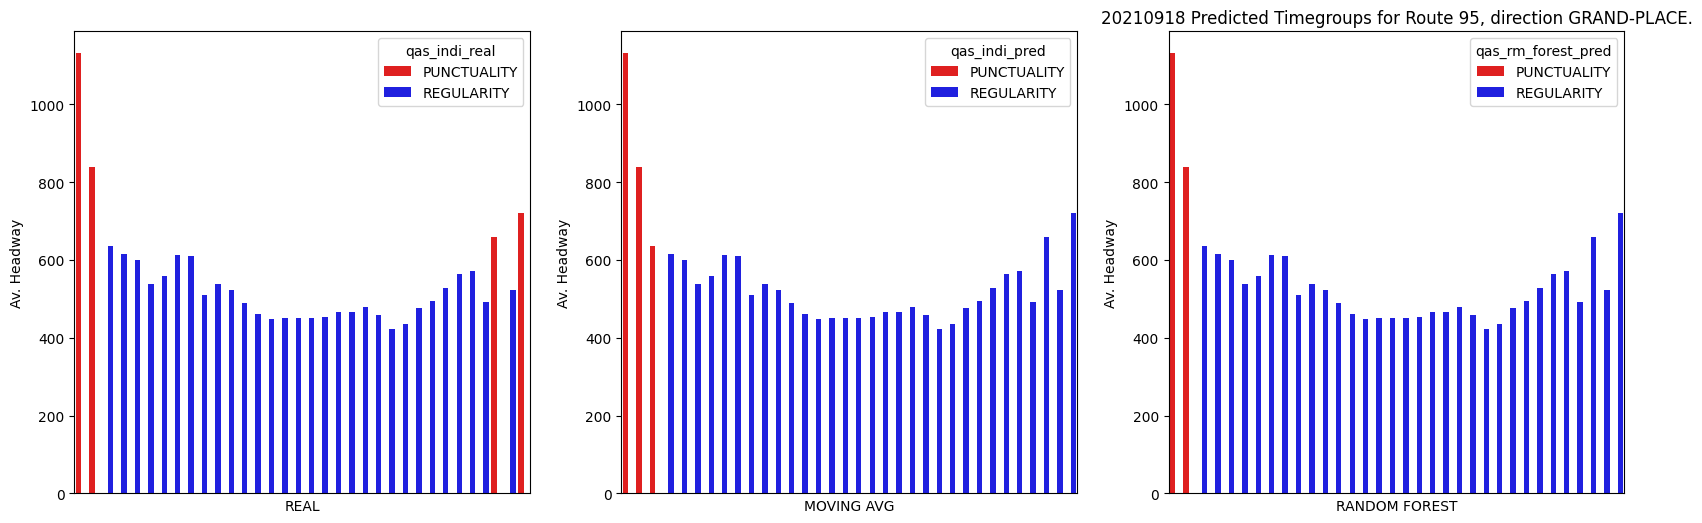

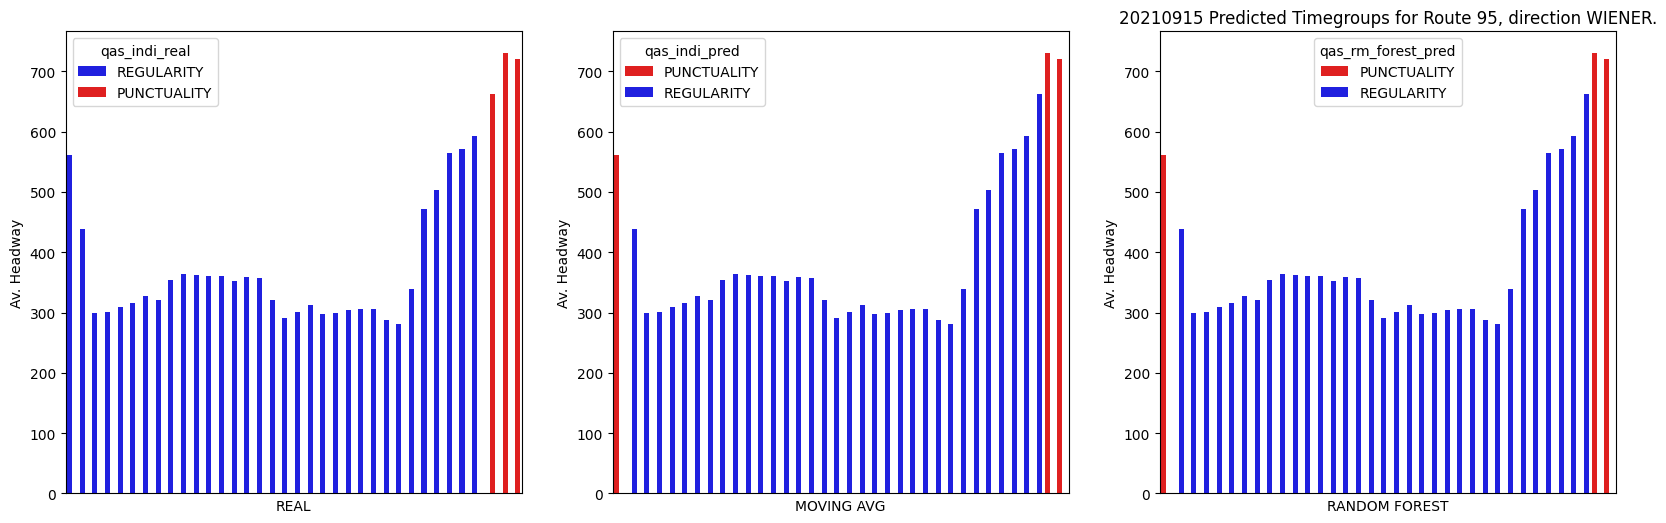

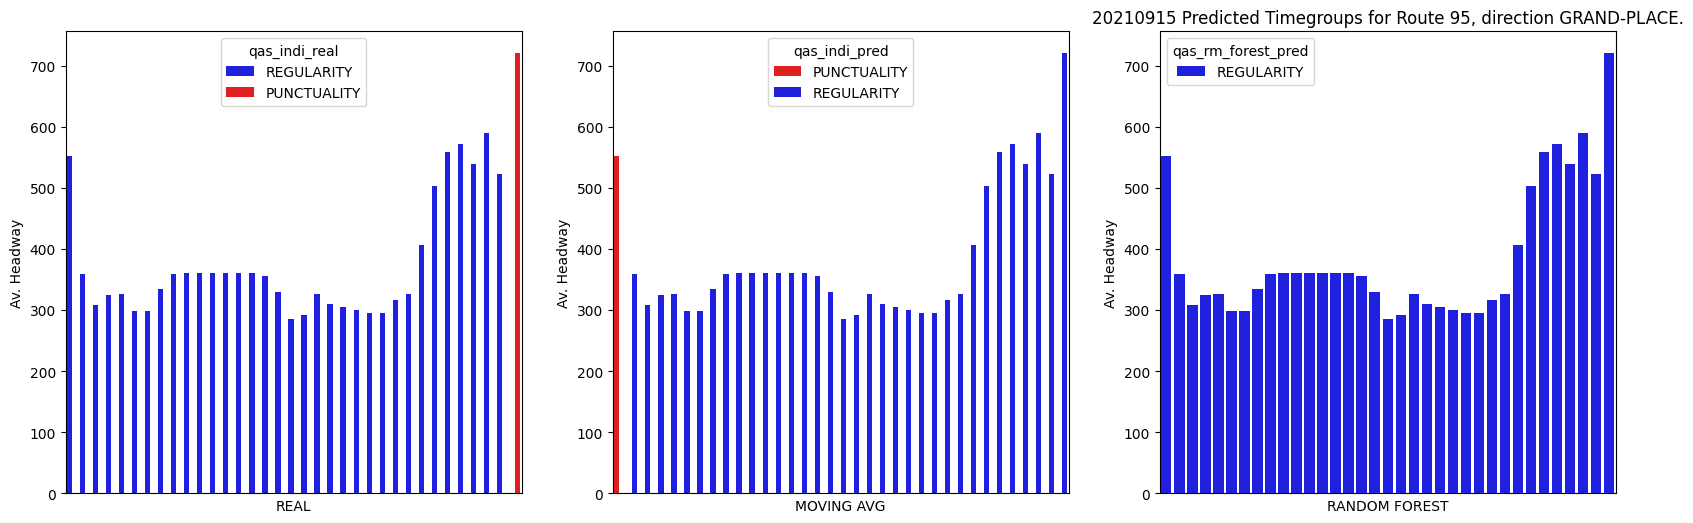

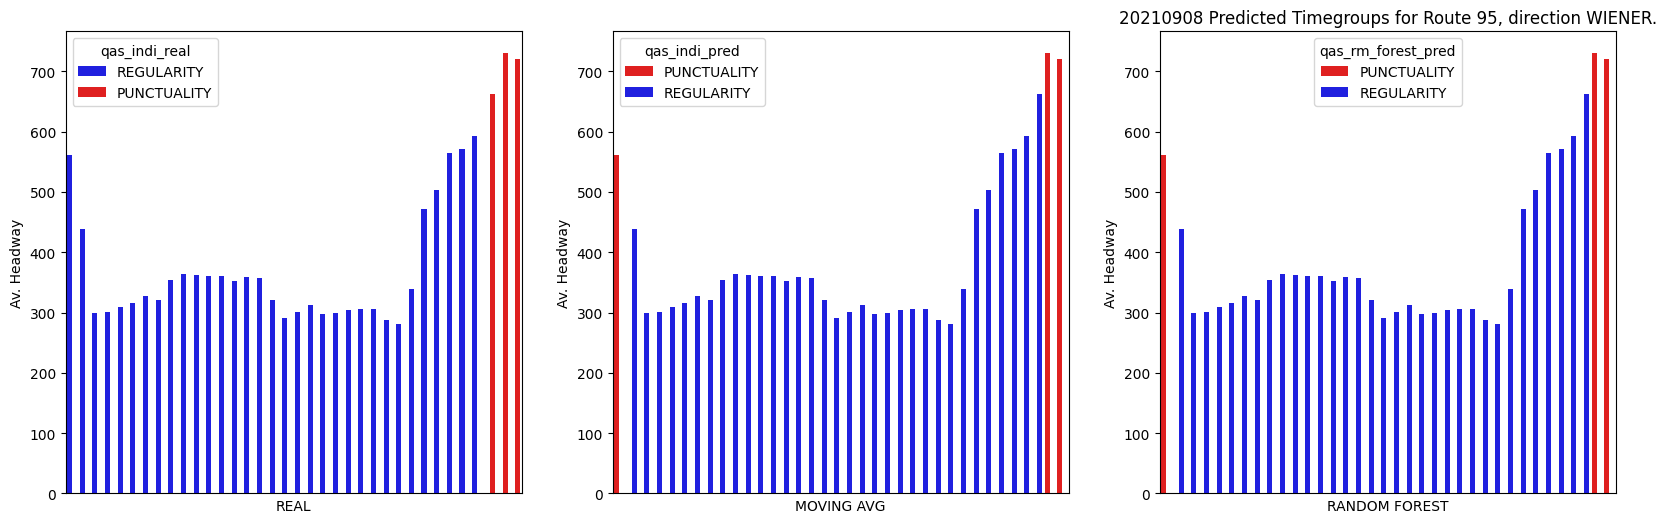

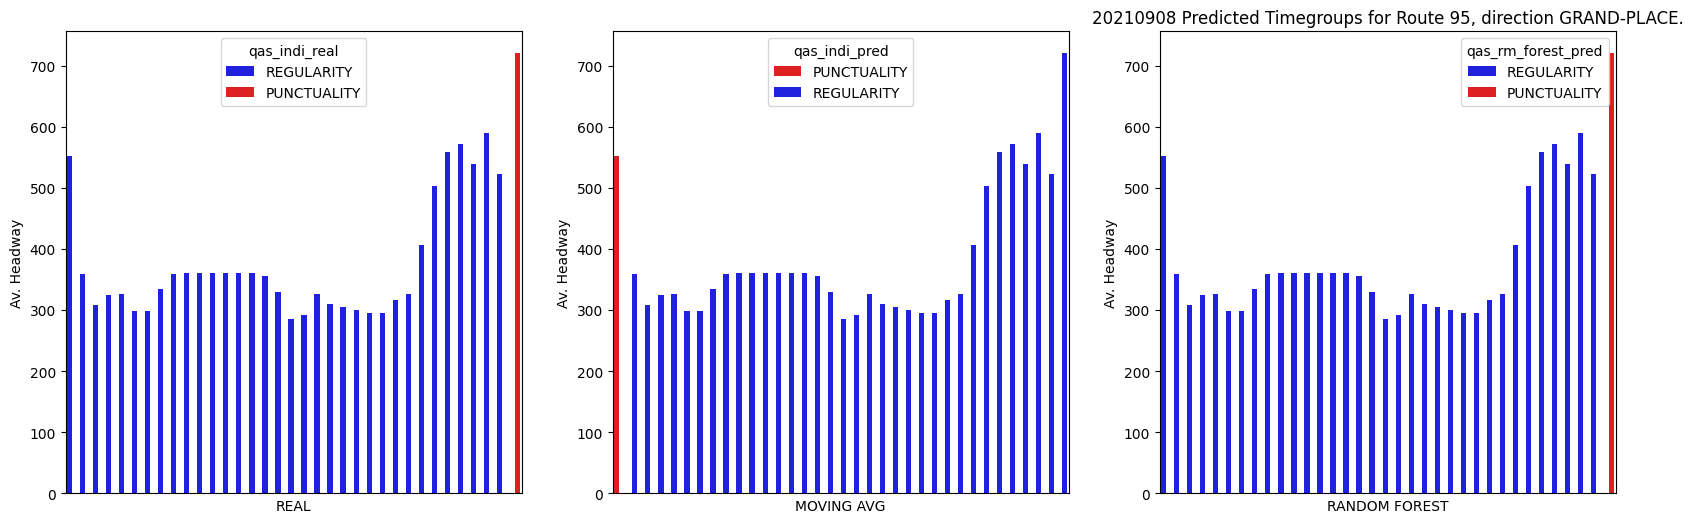

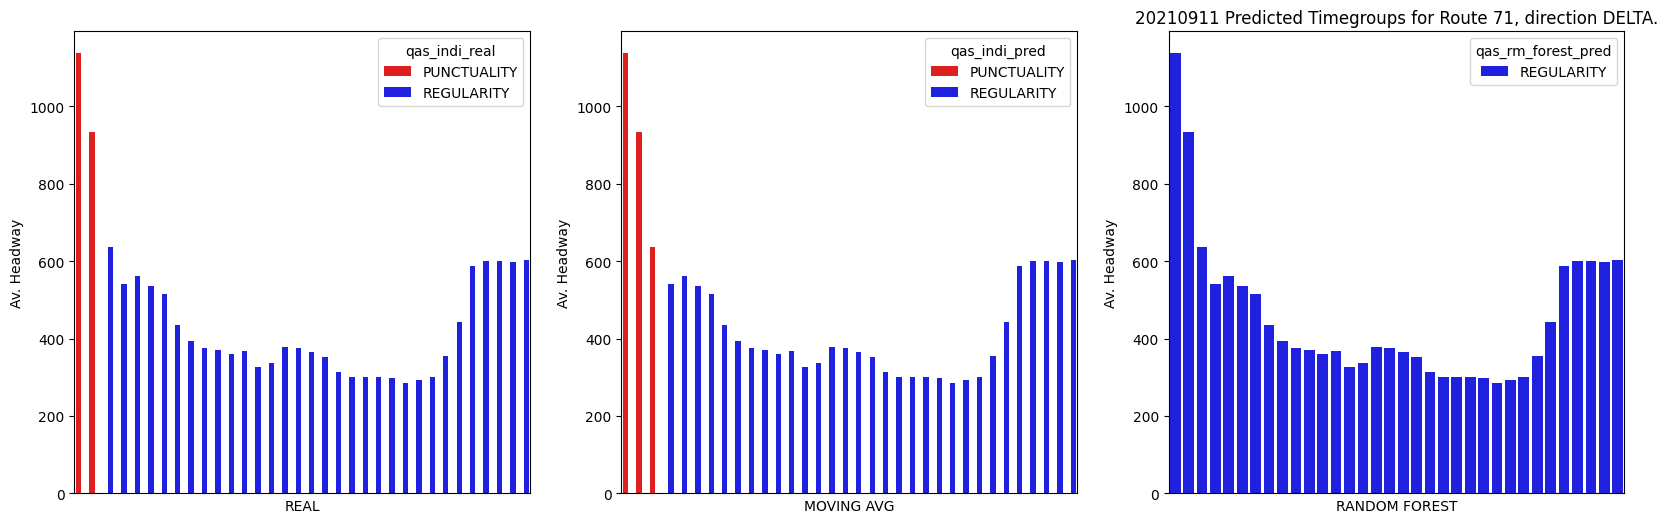

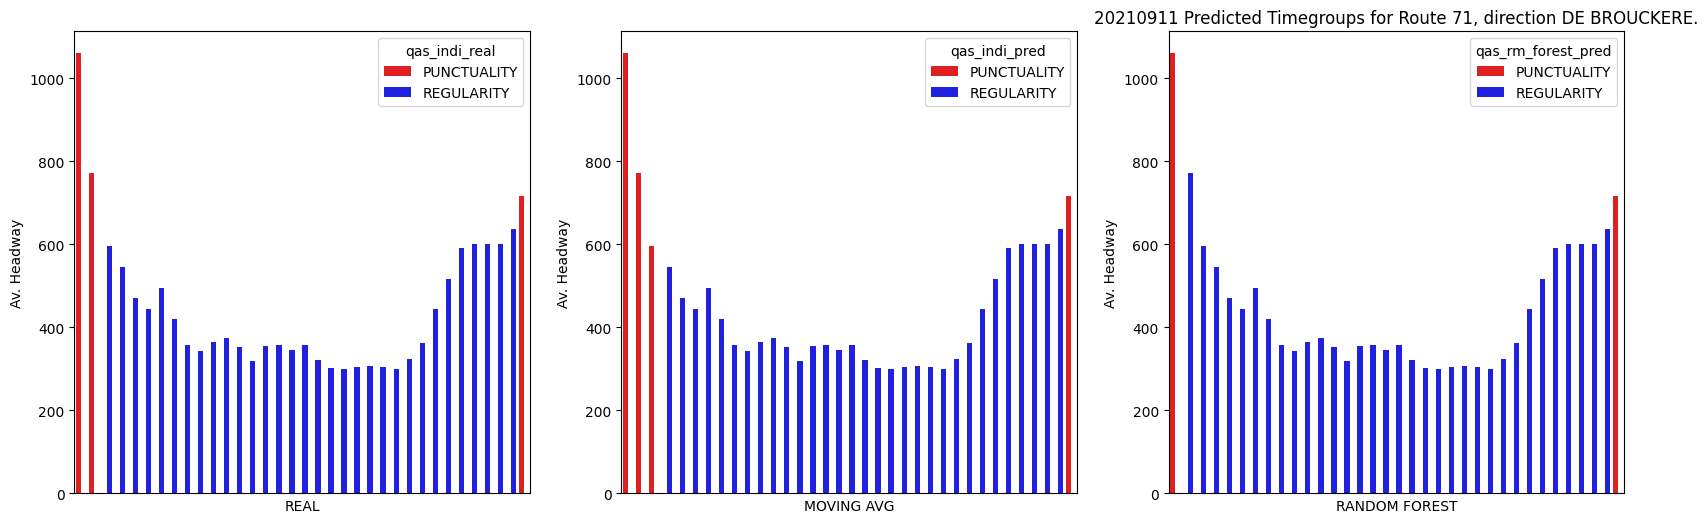

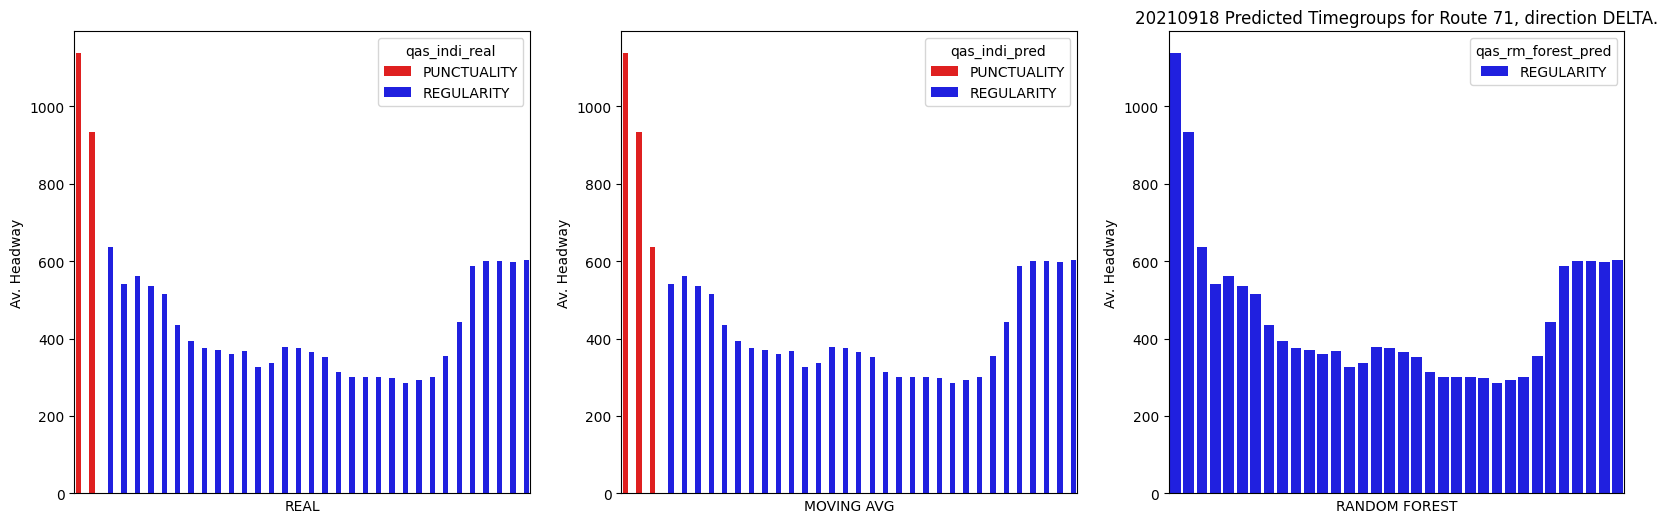

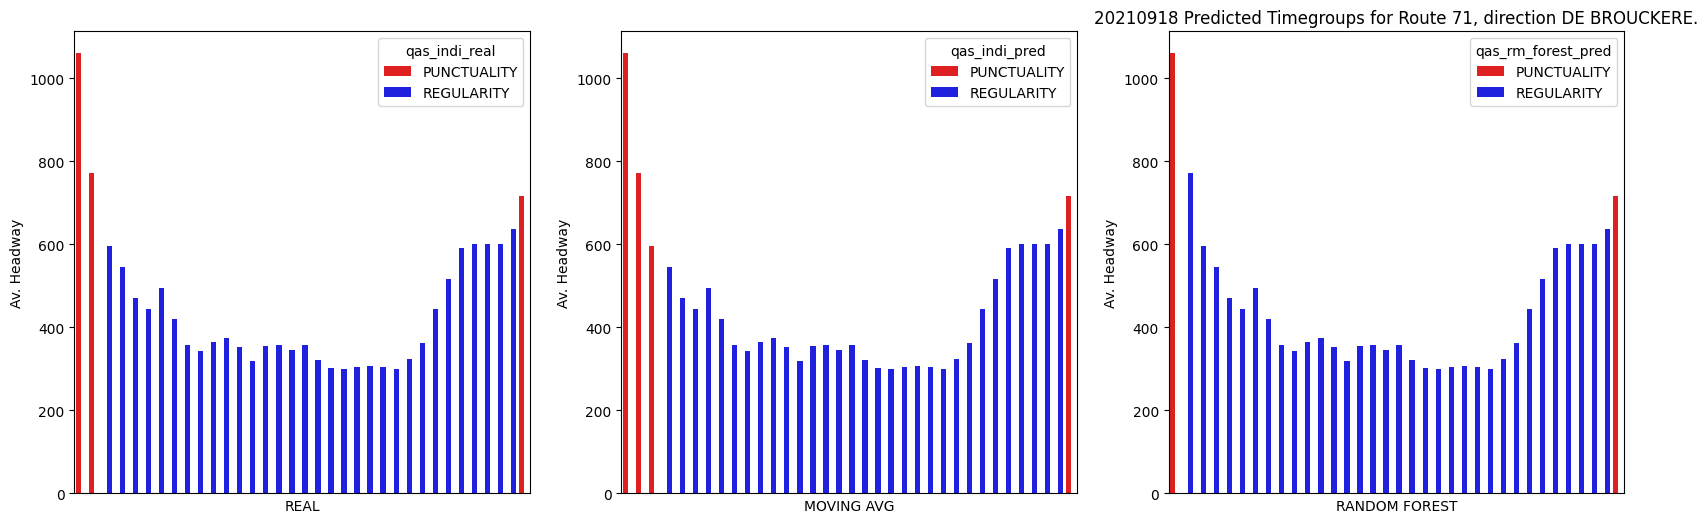

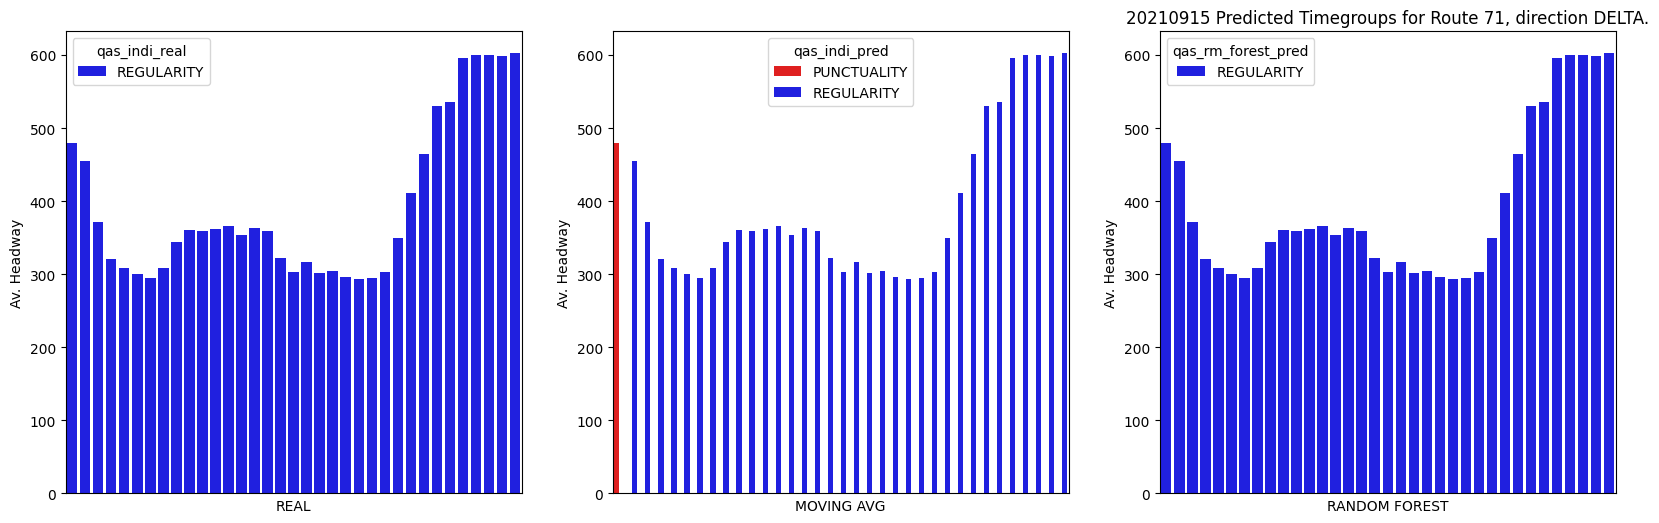

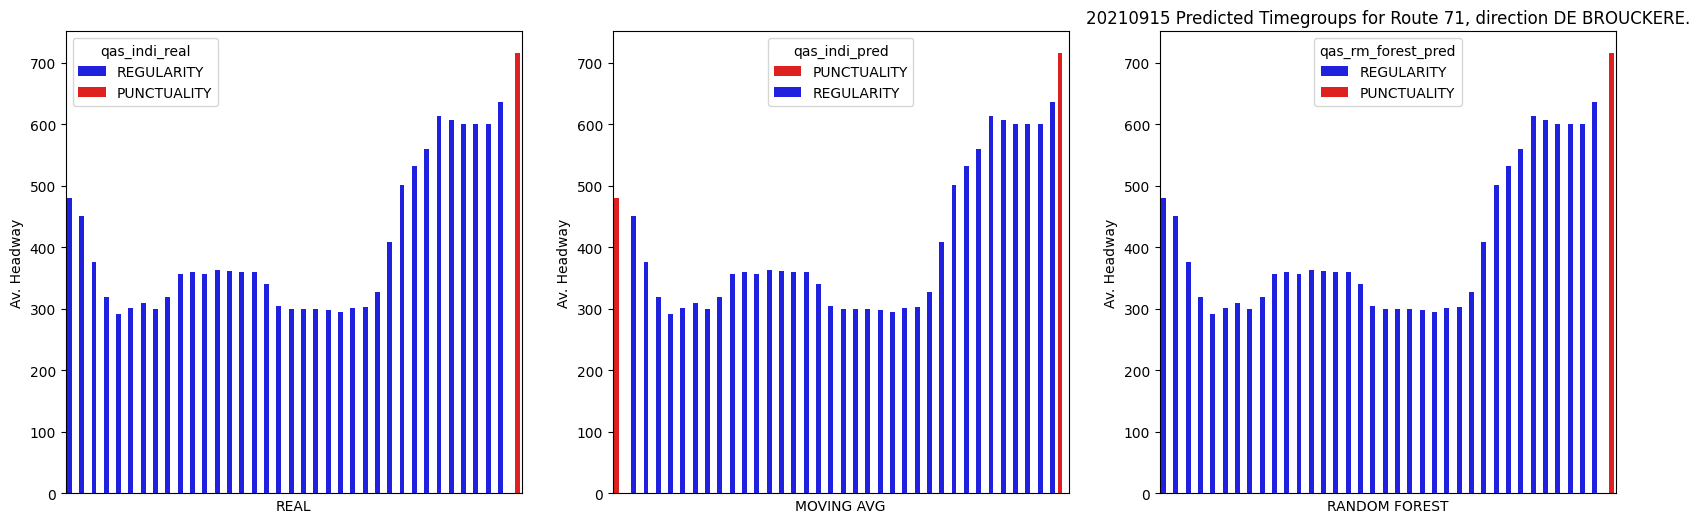

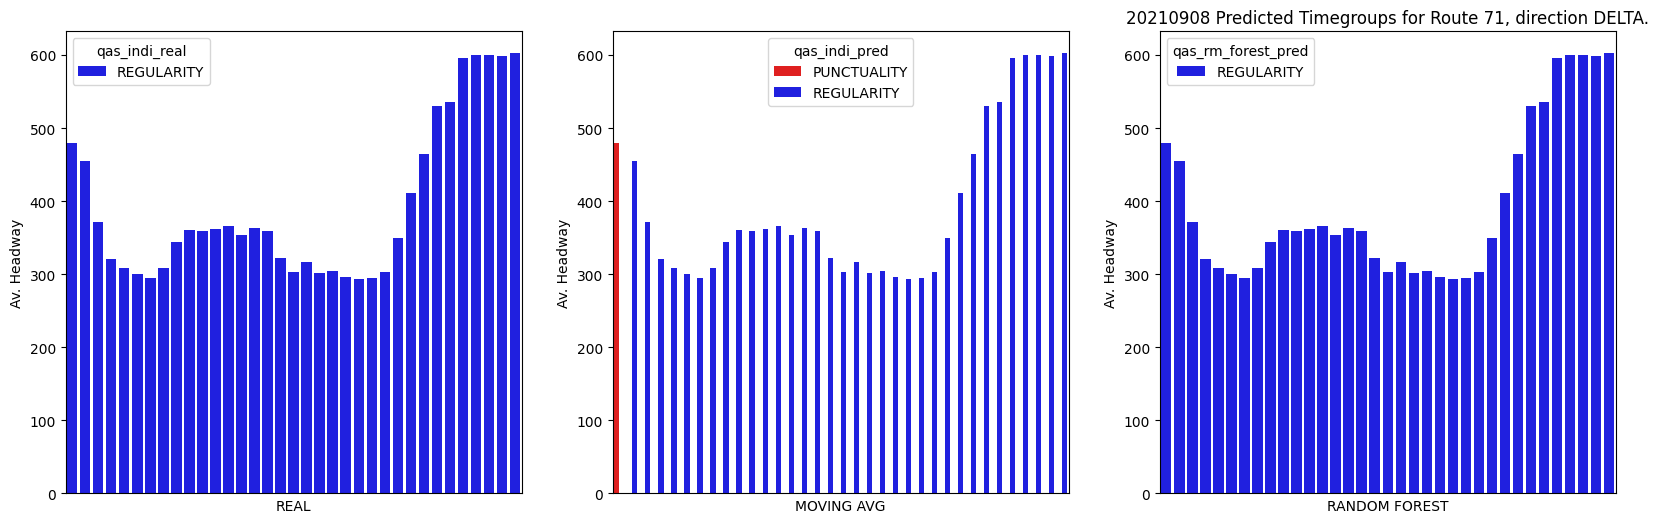

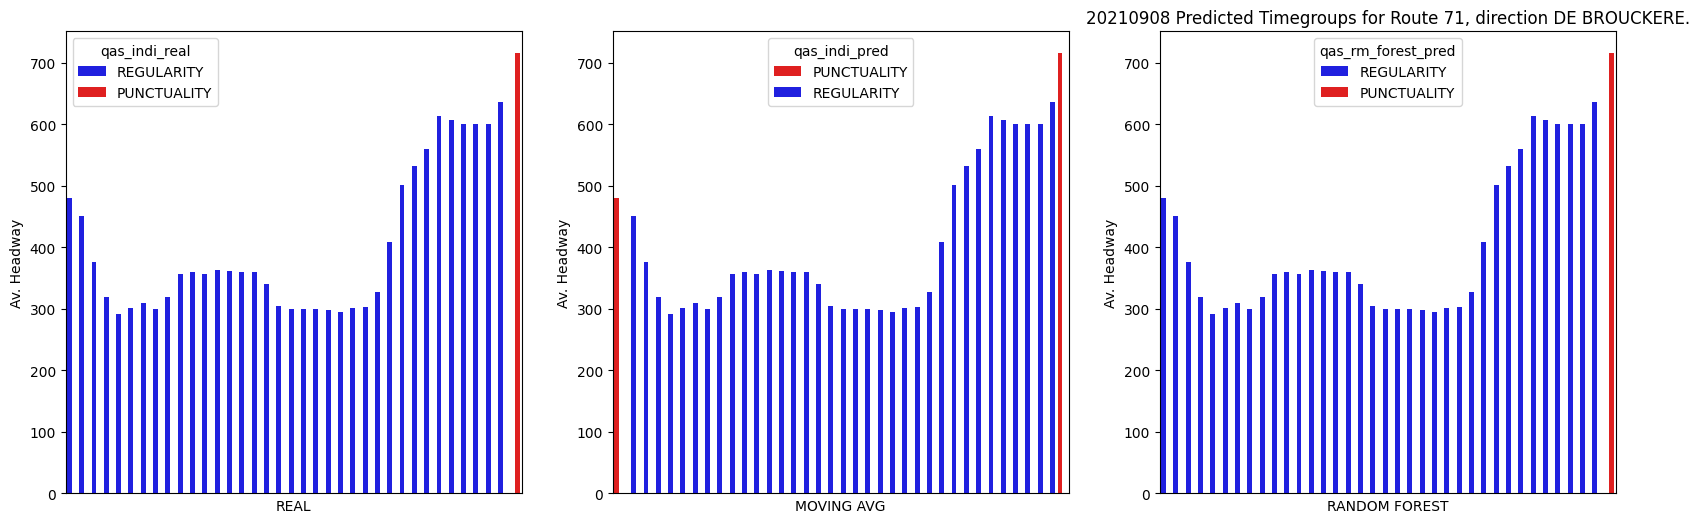

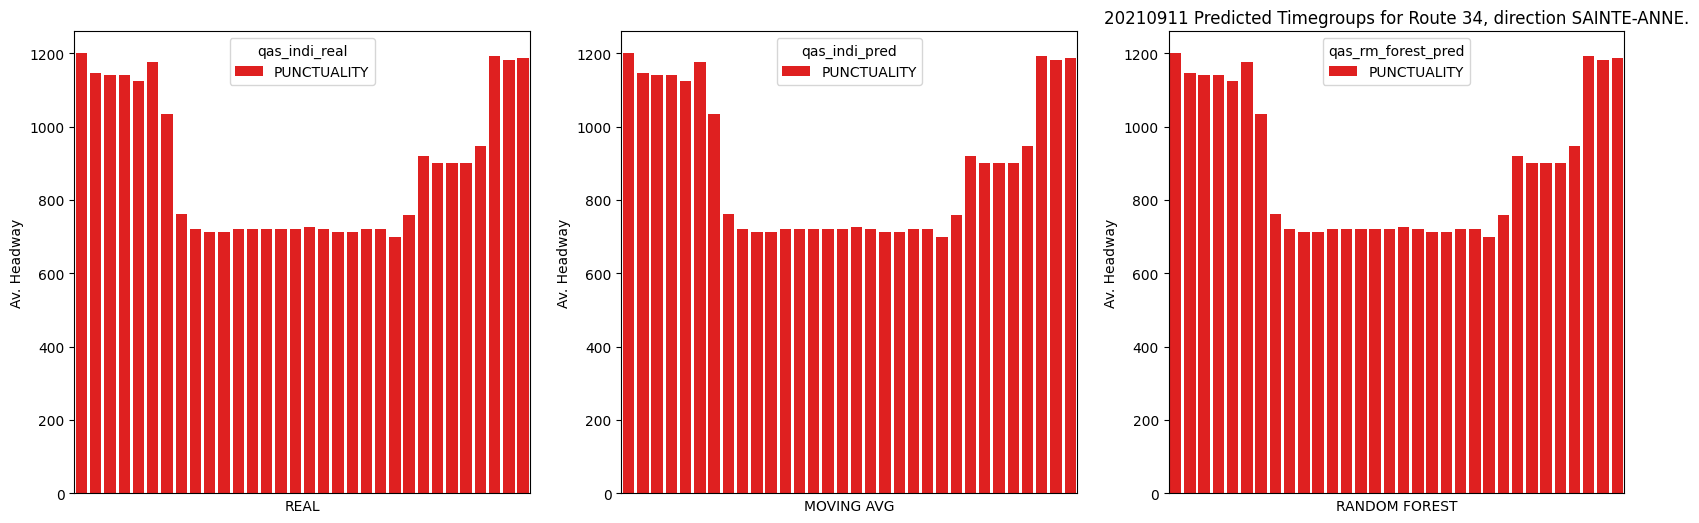

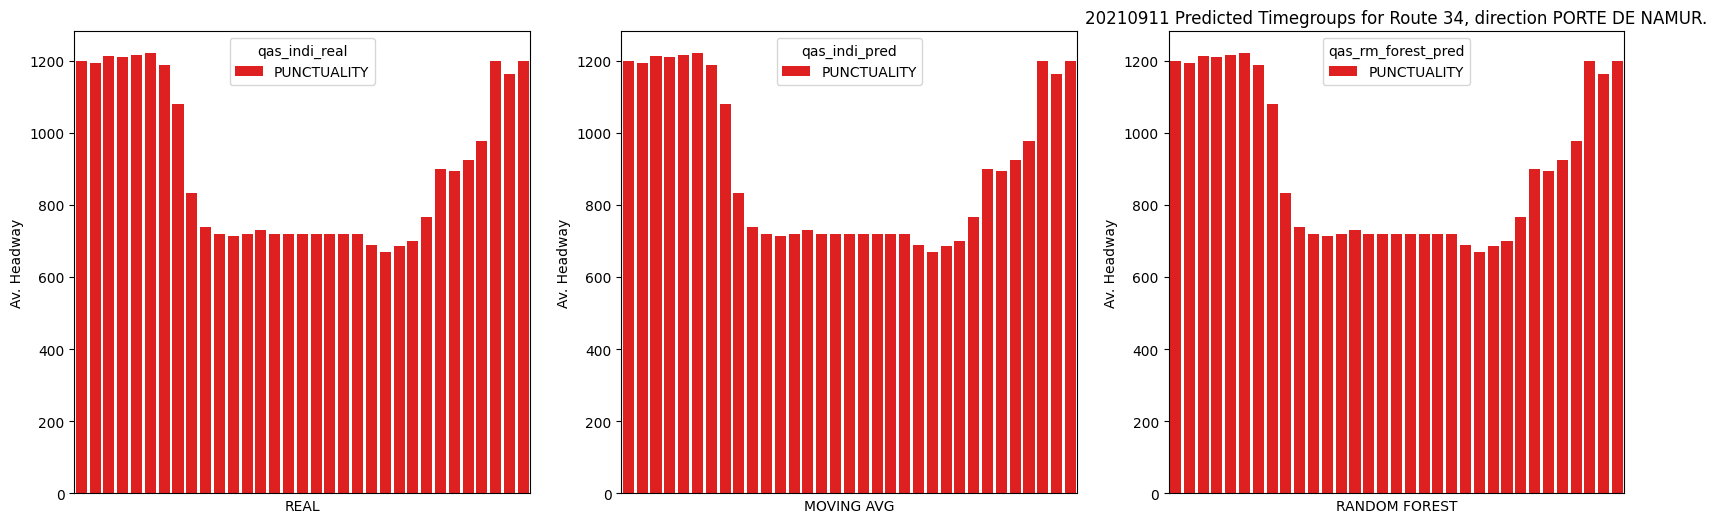

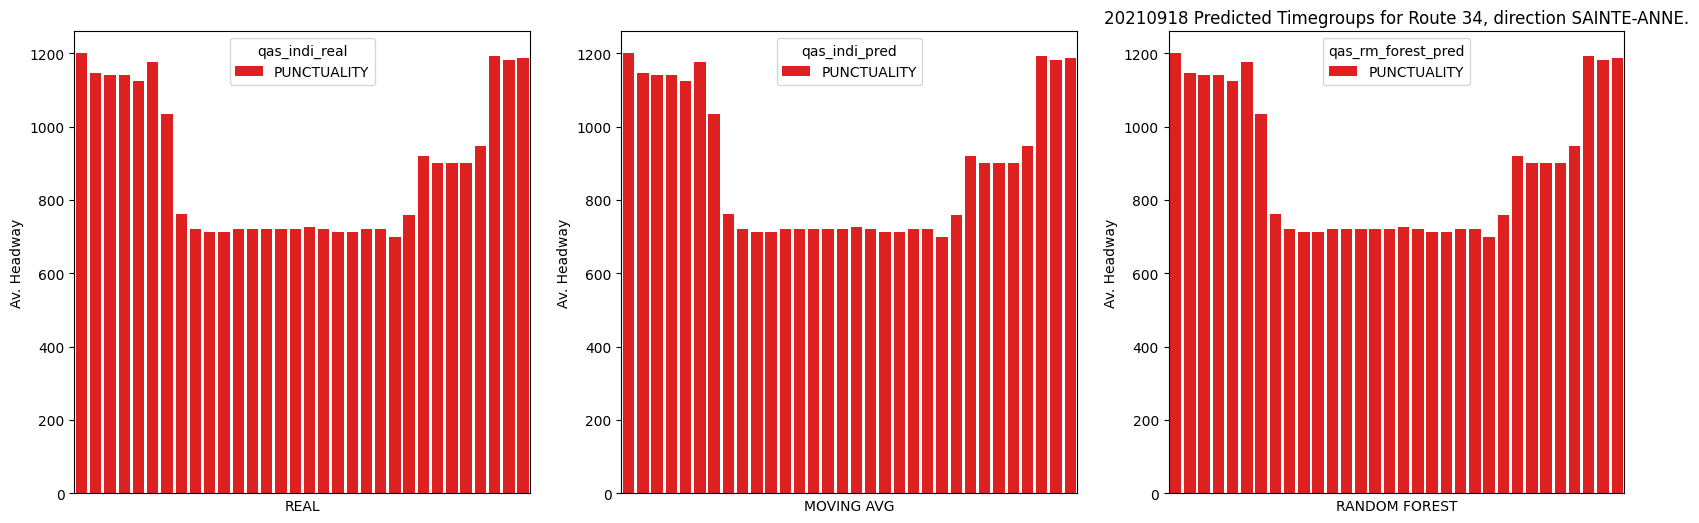

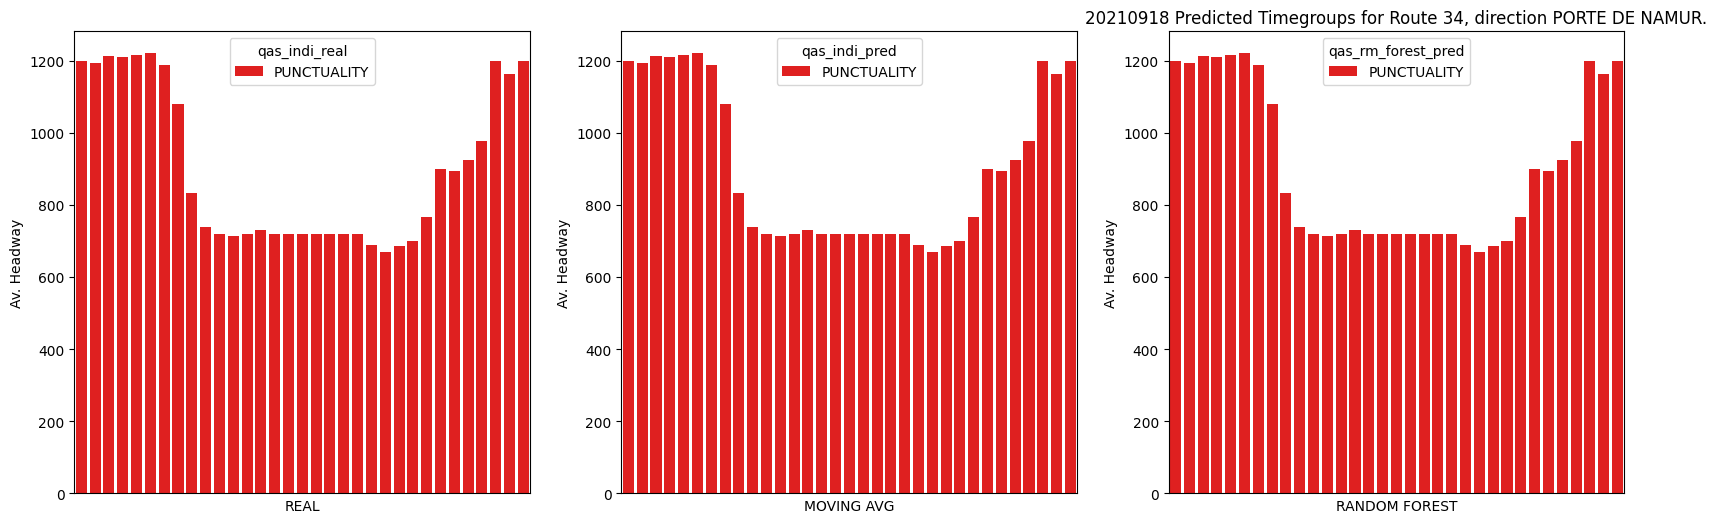

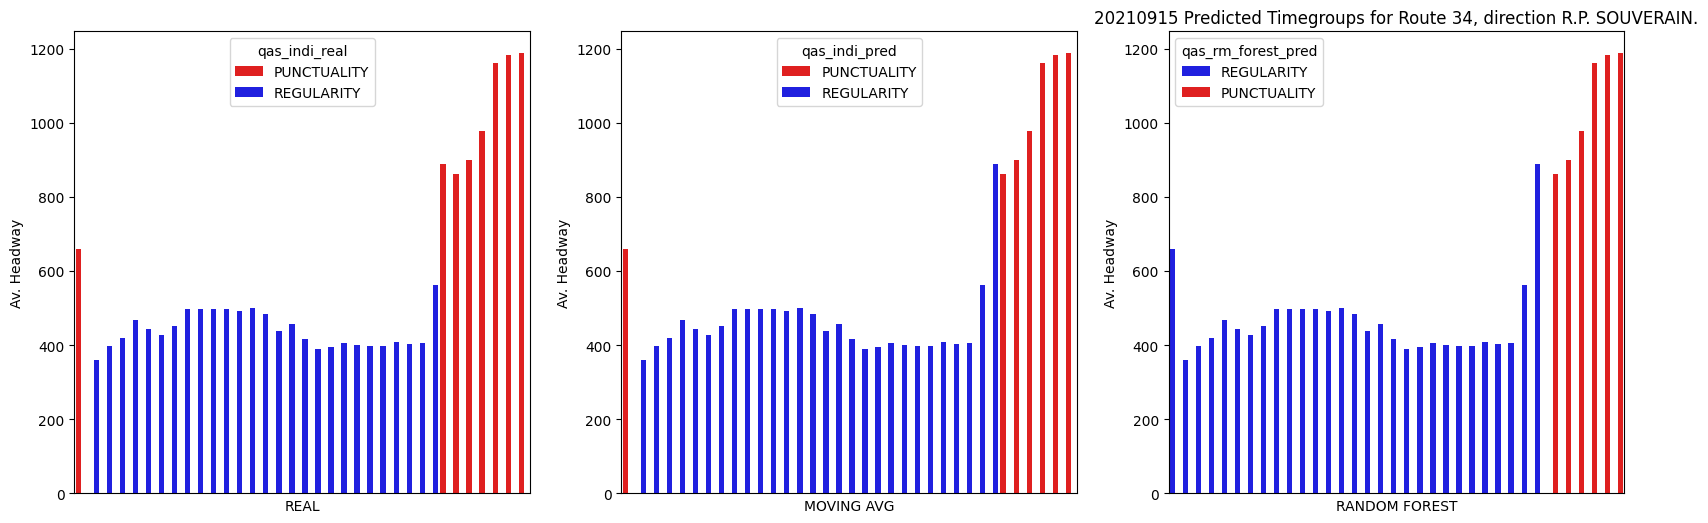

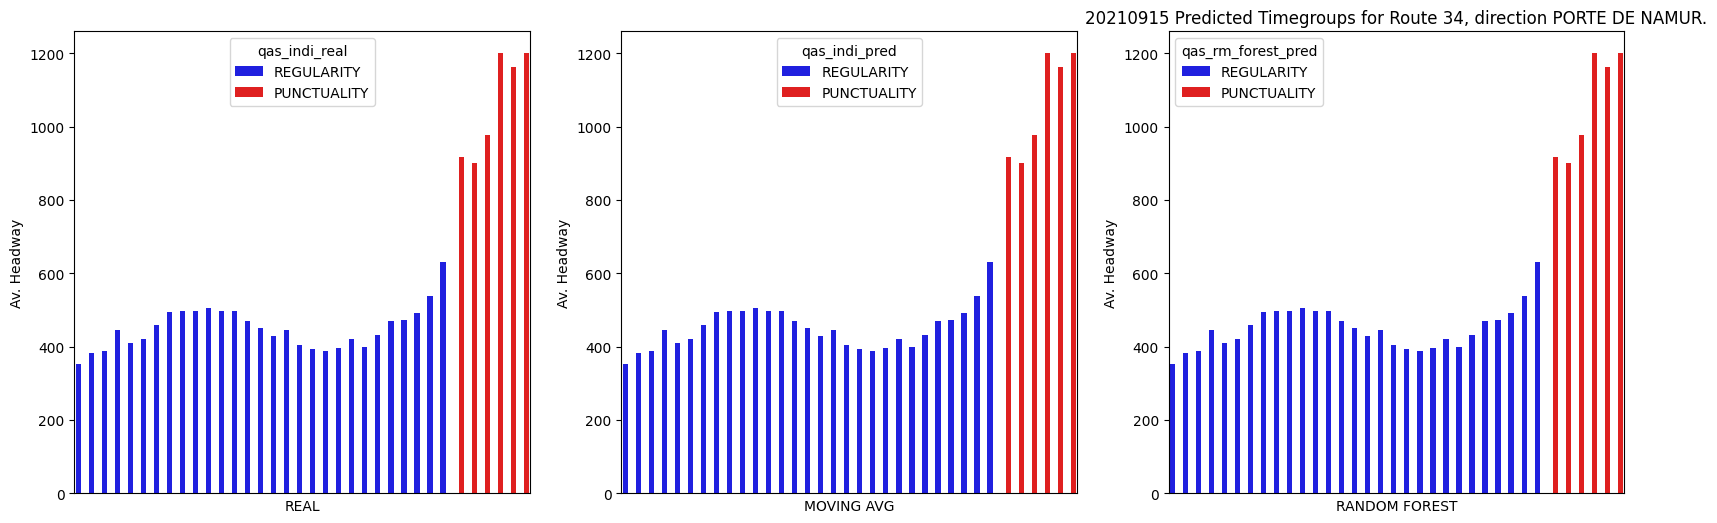

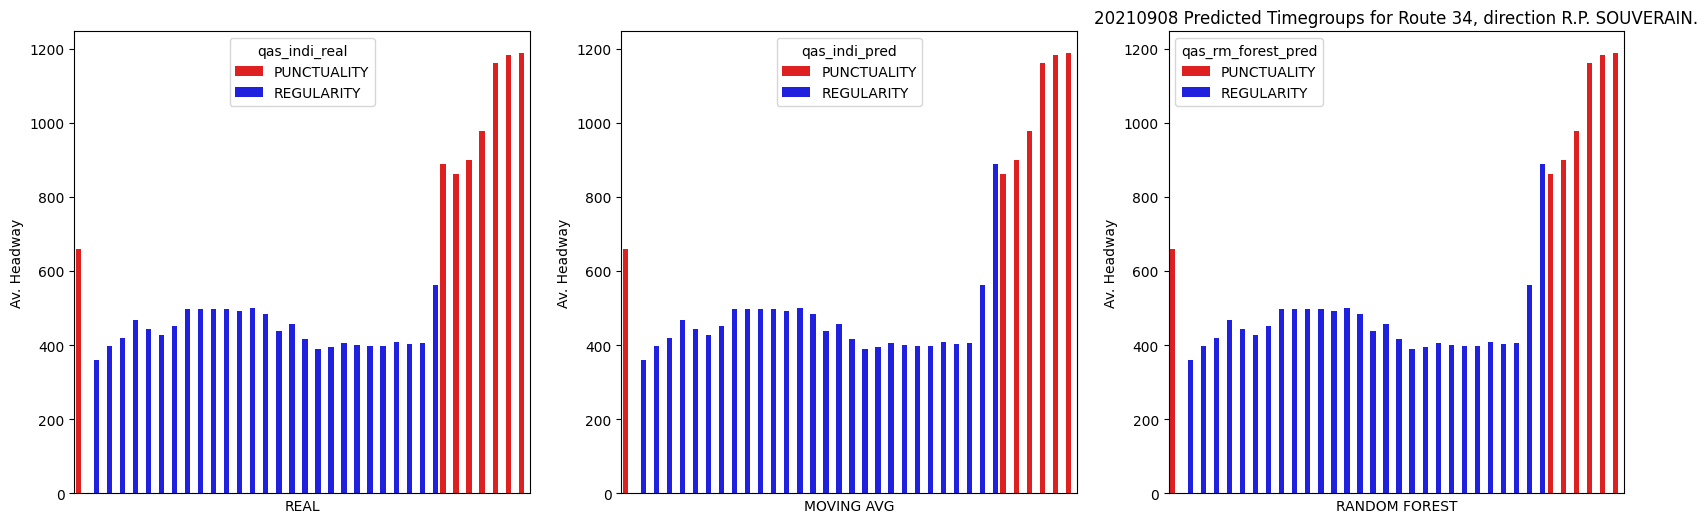

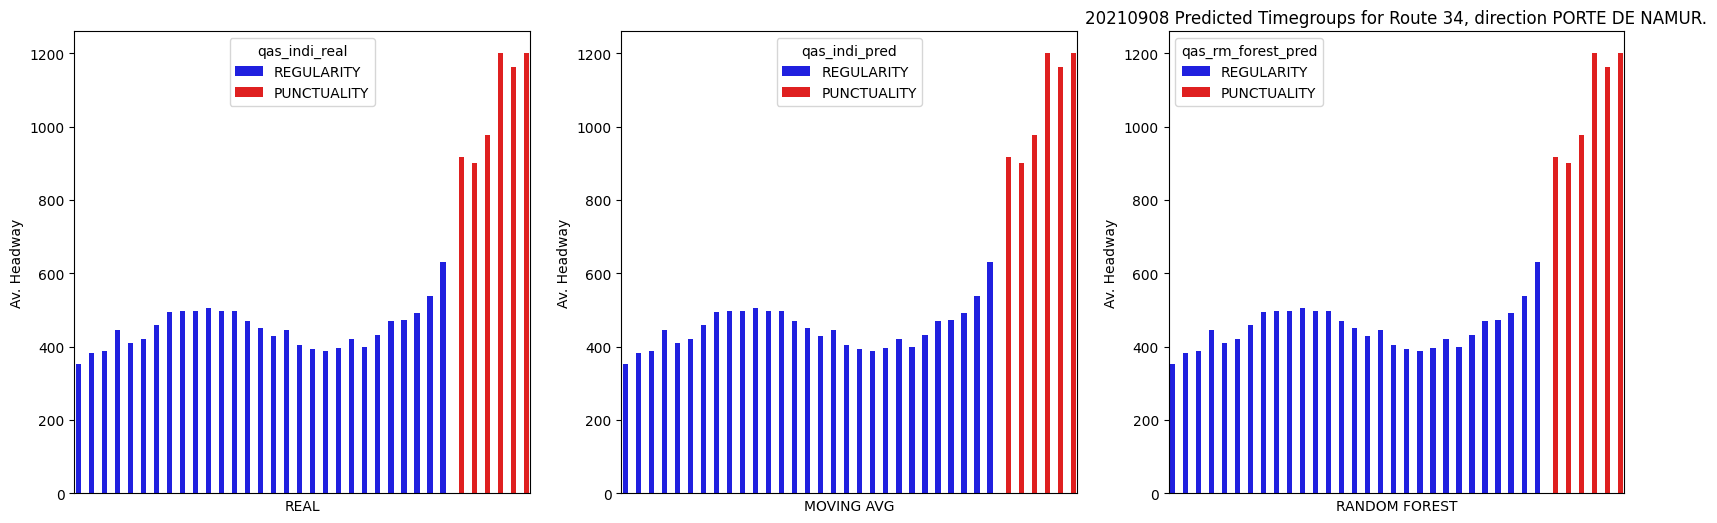

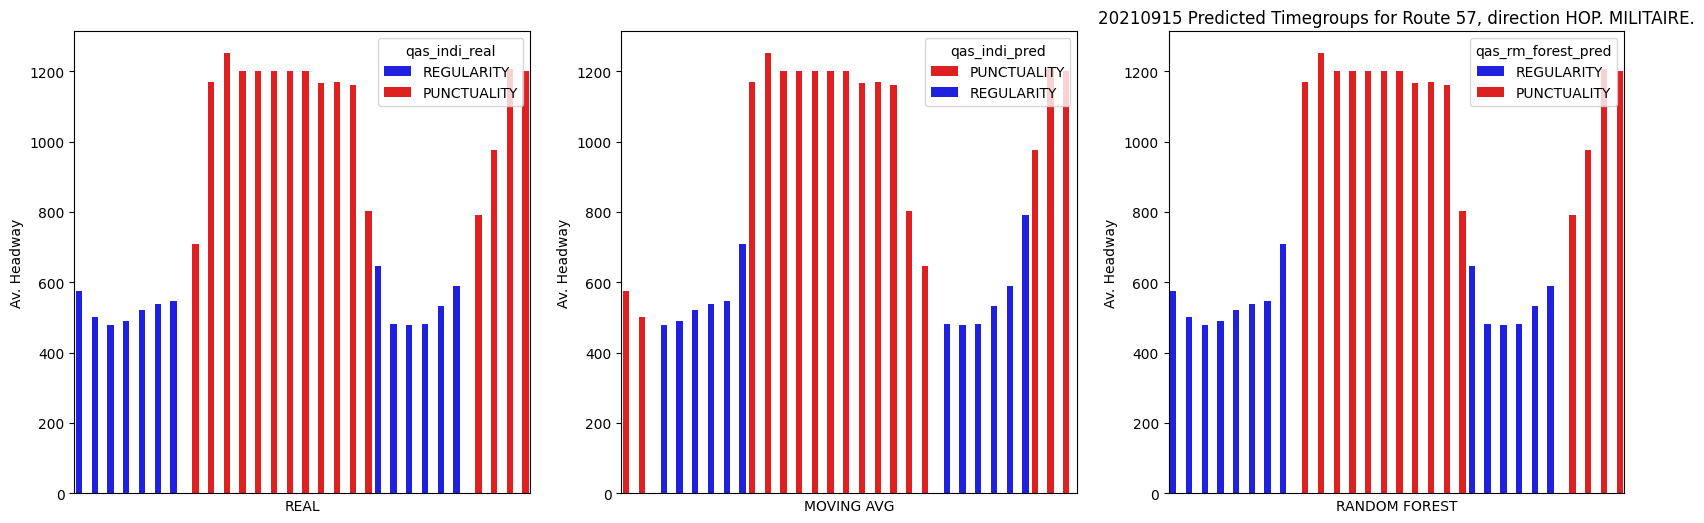

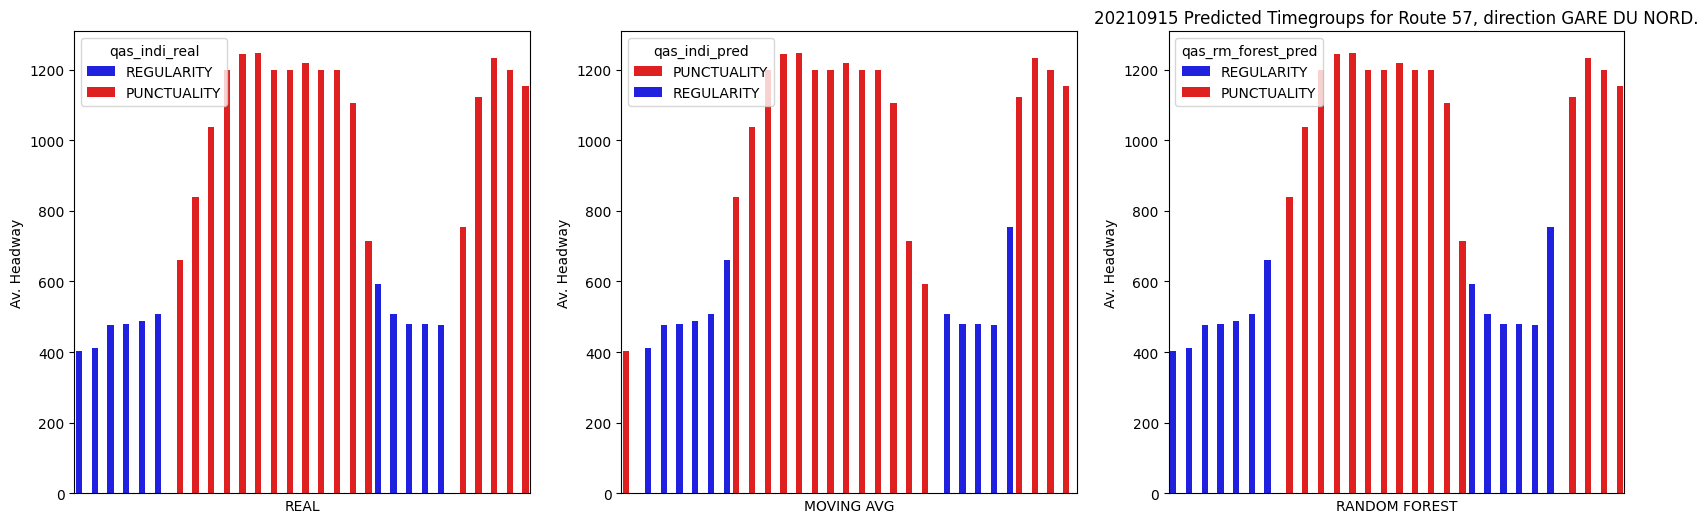

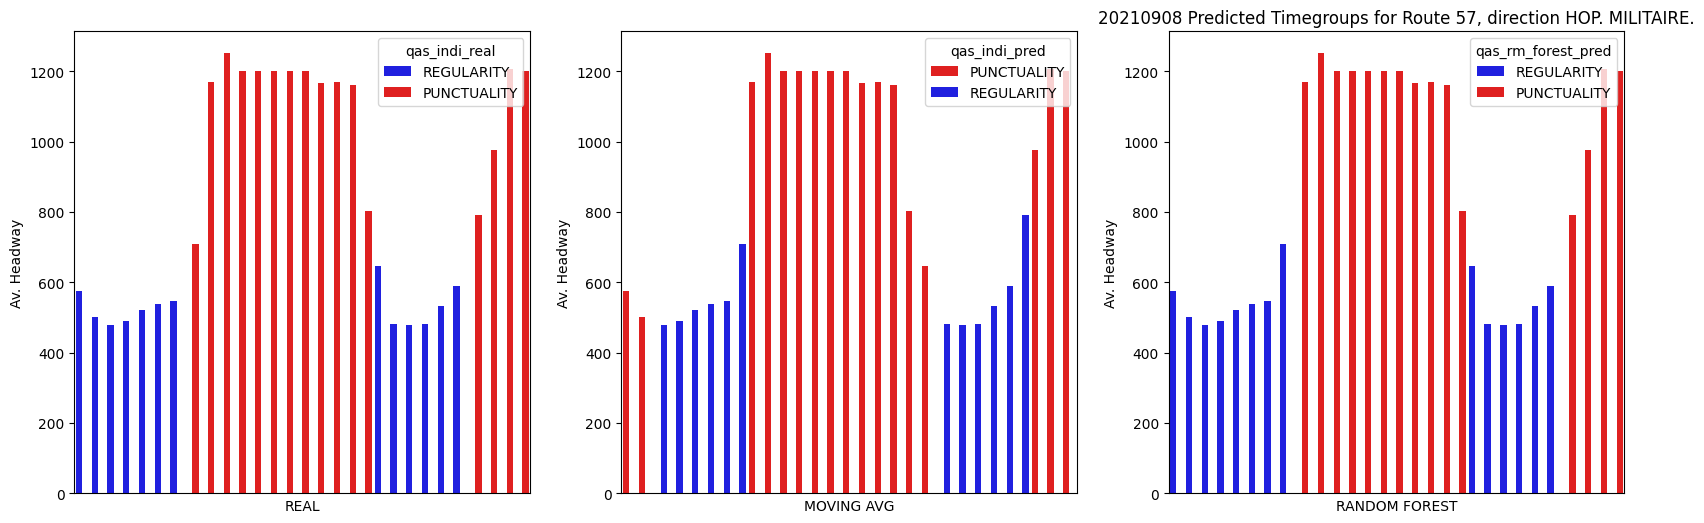

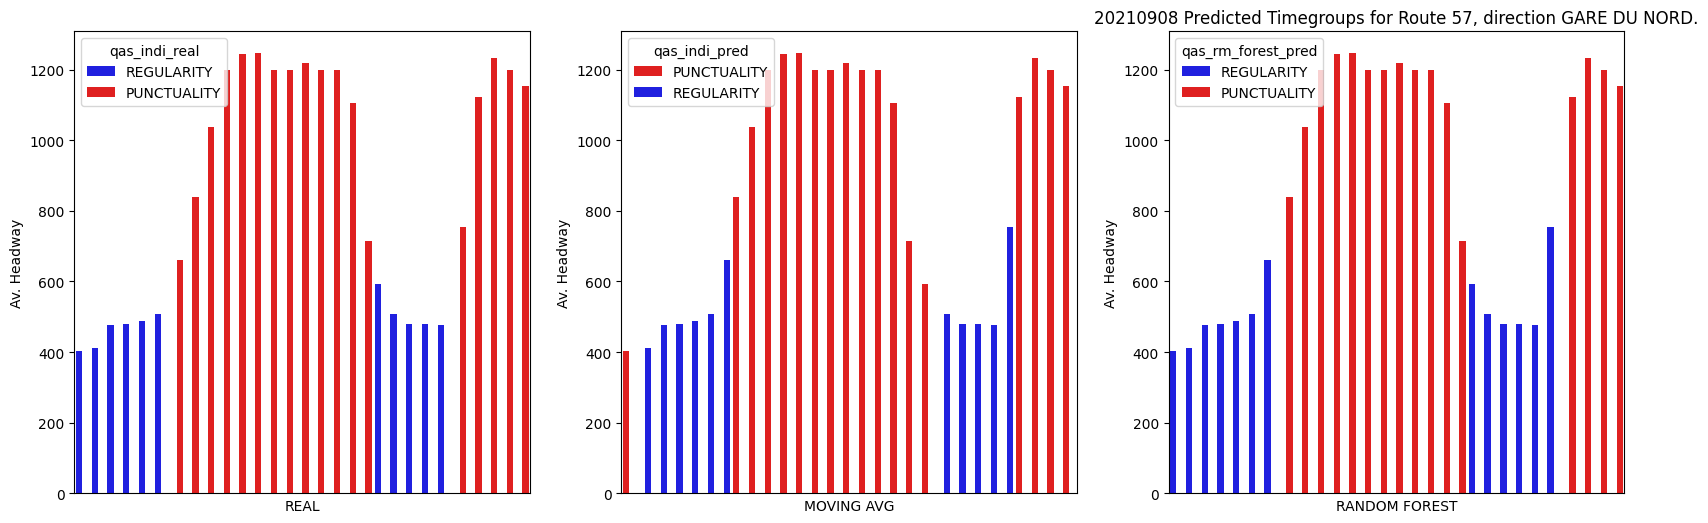

In [20]:
for route_id in routes.route_id.unique():
    for day in routes.date.unique():
        for direction in routes.direction_id.unique():
            plot_compare_classifiers(routes=routes, route_id=route_id, day=day, direction_id=direction, feed=feed)